In [1]:
import os, sys
import math
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm

import librosa

In [2]:
# project_root = "."

# sys.path.append(project_root)

In [3]:
from anc.constraints import (
    ConstraintCircle, 
    StabilityConstraintParabola, 
    StabilityConstraintHyperbola,
    ConstraintLowFreq,
    ConstraintHighFreq,
)

In [4]:
gain_margin = 6
phase_margin = 45

gain_max = 6

freq_low = 10
freq_high = 2000
gain_open_max = 0

In [5]:
constraint_circle = ConstraintCircle(gain_max)

constraint_parabola = StabilityConstraintParabola(gain_margin, phase_margin)
constraint_hyperbola = StabilityConstraintHyperbola(gain_margin)

constraint_lowfreq = ConstraintLowFreq(freq_low, gain_open_max)
constraint_highfreq = ConstraintHighFreq(freq_high, gain_open_max)

In [6]:
h_range = (-4, 2)
v_range = (-3, 3)

n_points = 1000

x = np.linspace(*h_range, n_points)
y = np.linspace(*v_range, n_points)

xx, yy = np.meshgrid(x, y)
z = (xx + 1j * yy)

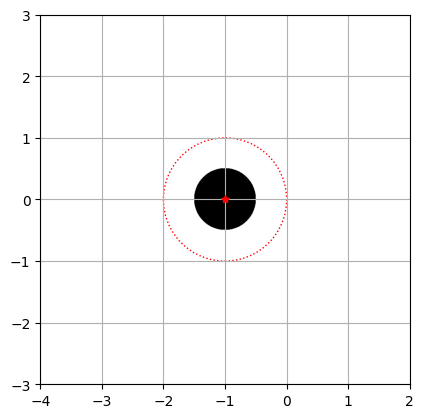

In [7]:
plt.imshow(constraint_circle(z) < 0, cmap="gray", extent=h_range+v_range);

plt.plot(-1, 0, "*r")

ax = plt.gca()
circle = plt.Circle((-1, 0), 1, color="r", linestyle=":", fill=False)
ax.add_patch(circle);

plt.grid(which="both");
# plt.axis("equal");

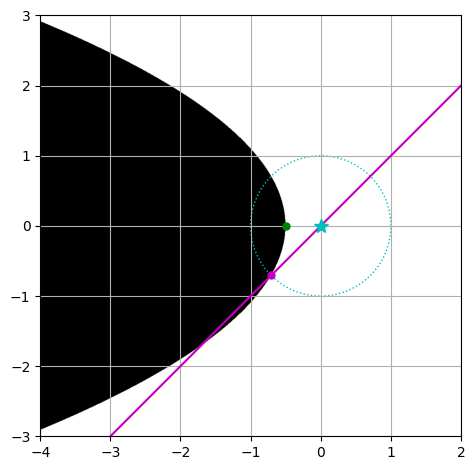

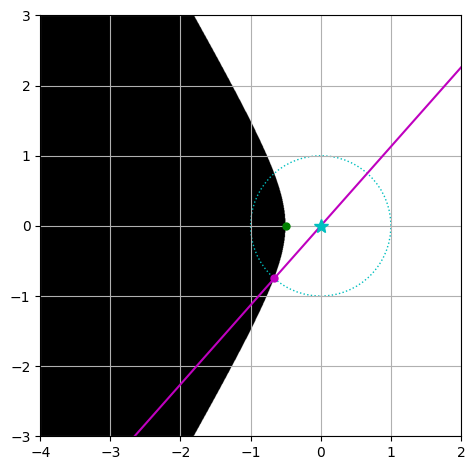

In [8]:
names = ["constraint_parabola", "constraint_hyperbola"]
constraints = [constraint_parabola, constraint_hyperbola]

for i, constraint in enumerate(constraints):

    GM = librosa.db_to_amplitude(constraint.gain_margin)
    PM = np.deg2rad(constraint.phase_margin)

    plt.figure();

    plt.imshow(constraint(z) < 0, cmap="gray", extent=h_range+v_range);
    
    plt.grid(which="both");

    ax = plt.gca()
    circle = plt.Circle((0, 0), 1, color="c", linestyle=":", fill=False)
    ax.add_patch(circle);
    
    plt.plot(-1 / GM, 0, "g.", markersize=10)

    v = np.tan(PM) * x
    plt.plot(x, v, "m");

    x0 = -np.cos(PM)
    y0 = -np.sin(PM)
    plt.plot(x0, y0, "m.", markersize=10);
    
    plt.plot(0, 0, "*c", markersize=10);

    plt.xlim(*h_range);
    plt.ylim(*v_range);
    
    plt.tight_layout();
    
    plt.savefig(f"{names[i]}.png", dpi=300); # move to /images